<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more manageable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [1]:
import pandas as pd

yelp = pd.read_json('./data/review_sample.json', lines=True)

In [2]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [10]:
""" This one is splitting everything into letters and I'm not sure why. """


# import spacy
# nlp = spacy.load("en_core_web_lg")

# def tokenize(document):
    
#     tokens = []
    
#     for doc in nlp.pipe(document):
#         doc_tokens = []
        
#         for token in doc:
#             if (token.is_stop == False) & (token.is_punct == False):
#                 doc_tokens.append(token.lemma_.lower())
        
#         tokens.append(doc_tokens)
            
#     return tokens

In [12]:
import string
from nltk.corpus import stopwords

def tokenize(words):
    
    no_punc = [char for char in words if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    
    return [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]

In [14]:
#tokenize(yelp['text'][0])

In [15]:
yelp['tokens'] = yelp['text'].apply(tokenize)

In [16]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,tokens
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w,"[BEWARE, FAKE, FAKE, FAKEWe, also, small, busi..."
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA,"[Came, lunch, Togo, Service, quick, Staff, fri..."
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA,"[Ive, Vegas, dozens, times, never, stepped, fo..."
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ,"[went, night, closed, part, street, party, bes..."
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA,"[35, 4, stars, bad, price, 1299, lunch, senior..."


In [18]:
def list_to_string(s):
    str1 = " "
    return (str1.join(s))

In [19]:
yelp['tokens_string'] = yelp['tokens'].apply(list_to_string)

In [20]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,tokens,tokens_string
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w,"[BEWARE, FAKE, FAKE, FAKEWe, also, small, busi...",BEWARE FAKE FAKE FAKEWe also small business Lo...
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA,"[Came, lunch, Togo, Service, quick, Staff, fri...",Came lunch Togo Service quick Staff friendly c...
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA,"[Ive, Vegas, dozens, times, never, stepped, fo...",Ive Vegas dozens times never stepped foot Circ...
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ,"[went, night, closed, part, street, party, bes...",went night closed part street party best part ...
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA,"[35, 4, stars, bad, price, 1299, lunch, senior...",35 4 stars bad price 1299 lunch seniors get 15...


## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english')

vect.fit(yelp['tokens_string'])

dtm = vect.transform(yelp['tokens_string'])

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [22]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=10, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [23]:
fake_review = ["""
This is the absolute worst place I have ever eaten at!

I saw rats running across the counters in the kitchen.

The restrooms were a nightmare and the staff was totally indifferent!

I will never return to this place and I would recommend it just shut down!
"""]

In [24]:
fake = vect.transform(fake_review)

nn.kneighbors(fake.todense())

(array([[4.47213595, 4.69041576, 4.69041576, 4.69041576, 4.69041576,
         4.79583152, 4.79583152, 4.79583152, 4.79583152, 4.79583152]]),
 array([[5129, 8023, 5087, 7189, 8493, 9167, 8945, 9020, 9776, 5506]],
       dtype=int64))

In [26]:
nearest = nn.kneighbors(fake.todense())[1][0]
nearest

array([5129, 8023, 5087, 7189, 8493, 9167, 8945, 9020, 9776, 5506],
      dtype=int64)

In [28]:
# Check if I got the correct list items
yelp['text'][8023]

'Kids fav place! Swedish pancakes!!'

In [29]:
# Print the text of the 10 nearest neighbors
for val in nearest:
    print(yelp['text'][val])
    print('='*40)

Best place everrrrr!!!
Kids fav place! Swedish pancakes!!
best place in Pittsburgh wish it was bigger.
My kinda of place quite and very peaceful atmosphere. I intend to return
This place is a joke save u money for somewhere else to stay place is ghetto and rude staff.
Great place! Cash ONLY!!! Be warning of the smell when you walk in.
WARNING! This place gives you ONE piece of toast with your breakfast...wtf???
I decided to try this place. Everyone was friendly however I would never go back.  I got the worst fungus in my fingernail.
The food here is not very good.  The service is slow.   It is a bit over price.   I would not recommend this place.
This location is always very clean and well kept. The staff is very friendly and I recommend this place to anyone looking for a tanning salon!


In [ ]:
""" Oh man. That is not at all like my fake review. These are all over the place. What's going on???"""

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a pipeline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
vekt = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
clf = RandomForestClassifier()

pipe = Pipeline([('vect', vect), ('clf', clf)])

In [33]:
parameters = {
    'vect__max_df': (0.75, 1.0),
    'vect__min_df': (.02, .05),
    'vect__max_features': (500,1000),
    'clf__n_estimators':(5, 10),
    'clf__max_depth':(5,10,15,20)
}

grid_search = GridSearchCV(pipe, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(yelp['tokens_string'], yelp['stars'])

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   36.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [34]:
pred = grid_search.predict(fake_review)

In [35]:
pred

array([1], dtype=int64)

In [ ]:
""" That says my fake_review would be a 1 star, right? """

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [36]:
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary

Learn the vocabulary of the yelp data:

In [56]:
id2word = Dictionary(yelp['tokens'])
print(len(id2word))

39406


In [57]:
# Cut word count down
id2word.filter_extremes(no_below=5, no_above=.98)
print(len(id2word))

8799


Create a bag of words representation of the entire corpus

In [44]:
corpus = [id2word.doc2bow(d) for d in yelp['tokens']]

Your LDA model should be ready for estimation: 

In [52]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=12,
                   num_topics = 15 # You can change this parameter
                  )

In [53]:
lda.print_topics()

[(0,
  '0.010*"food" + 0.010*"place" + 0.008*"good" + 0.008*"one" + 0.008*"get" + 0.007*"like" + 0.006*"service" + 0.006*"great" + 0.006*"really" + 0.005*"back"'),
 (1,
  '0.013*"good" + 0.009*"food" + 0.007*"place" + 0.007*"get" + 0.007*"like" + 0.006*"back" + 0.006*"one" + 0.006*"time" + 0.006*"service" + 0.005*"great"'),
 (2,
  '0.007*"food" + 0.007*"like" + 0.007*"place" + 0.006*"go" + 0.006*"time" + 0.006*"good" + 0.006*"service" + 0.006*"would" + 0.005*"really" + 0.005*"get"'),
 (3,
  '0.008*"back" + 0.007*"good" + 0.007*"get" + 0.007*"food" + 0.006*"great" + 0.006*"place" + 0.006*"really" + 0.006*"would" + 0.006*"go" + 0.006*"us"'),
 (4,
  '0.008*"food" + 0.008*"place" + 0.007*"time" + 0.007*"good" + 0.006*"get" + 0.006*"would" + 0.006*"great" + 0.006*"like" + 0.005*"really" + 0.005*"service"'),
 (5,
  '0.012*"place" + 0.010*"time" + 0.010*"food" + 0.009*"one" + 0.008*"good" + 0.007*"get" + 0.006*"like" + 0.006*"service" + 0.006*"would" + 0.005*"great"'),
 (6,
  '0.010*"place" +

In [54]:
import re
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

topics = [' '.join(t[0:5]) for t in words]

for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
food place good one get

------ Topic 1 ------
good food place get like

------ Topic 2 ------
food like place go time

------ Topic 3 ------
back good get food great

------ Topic 4 ------
food place time good get

------ Topic 5 ------
place time food one good

------ Topic 6 ------
place good one time great

------ Topic 7 ------
good great food service time

------ Topic 8 ------
good food service back place

------ Topic 9 ------
great place food time good

------ Topic 10 ------
place great food good like

------ Topic 11 ------
place food good get like

------ Topic 12 ------
place would good get food

------ Topic 13 ------
food like back great good

------ Topic 14 ------
good food place great service



In [ ]:
""" These are all similar and positive... but the plot below only shows
    a small amount of overlap. ??? I don't understand what's happening! """

In [64]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

pyLDAvis.gensim.prepare(lda, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
5      0.000010 -0.004620       1        1  7.497251
13    -0.005002 -0.002858       2        1  7.041616
14     0.002465 -0.001843       3        1  6.971766
0      0.000277 -0.001438       4        1  6.731255
3     -0.003130  0.002718       5        1  6.706308
9      0.000663 -0.002438       6        1  6.645138
8     -0.001612  0.000112       7        1  6.633480
1      0.000105  0.000463       8        1  6.621549
2     -0.000738  0.003001       9        1  6.614297
6      0.002431  0.000938      10        1  6.605077
4     -0.001771  0.001684      11        1  6.560735
7     -0.001561  0.001356      12        1  6.414484
11     0.001276 -0.000784      13        1  6.342558
12     0.001512  0.003326      14        1  6.330816
10     0.005076  0.000385      15        1  6.283666, topic_info=        Term         Freq        Total Category  logprob  loglift
143    place  4652.000000  4652.000000  Default  30.0000  30.0000
235    great  3415.000000  3415.000000  Default  29.0000  29.0000
49      good  4365.000000  4365.000000  Default  28.0000  28.0000
109      one  2963.000000  2963.000000  Default  27.0000  27.0000
161     food  4497.000000  4497.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
16       get   124.994217  3156.685059  Topic15  -5.5771  -0.4618
361  service   120.243019  3132.496094  Topic15  -5.6159  -0.4929
204   really   109.523567  2438.665039  Topic15  -5.7093  -0.3358
612       Im    90.875648  1536.935303  Topic15  -5.8959  -0.0608
423    order    90.531914  1505.882690  Topic15  -5.8997  -0.0442

[1284 rows x 6 columns], token_table=      Topic      Freq Term
term                      
1737      1  0.057124    1
1737      2  0.069819    1
1737      3  0.065587    1
1737      4  0.063472    1
1737      5  0.074050    1
...     ...       ...  ...
3658     11  0.043023    à
3658     12  0.057365    à
3658     13  0.086047    à
3658     14  0.086047    à
3658     15  0.057365    à

[8670 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 14, 15, 1, 4, 10, 9, 2, 3, 7, 5, 8, 12, 13, 11])

Create 1-2 visualizations of the results

In [63]:
yelp['funny'].value_counts().sort_index()

0     7927
1     1216
2      416
3      168
4       79
5       54
6       30
7       28
8       17
9       13
10       8
11       8
12       8
13       2
14       2
15       2
16       2
17       4
18       1
19       1
20       1
21       1
22       1
23       3
26       1
27       1
31       1
32       1
35       1
37       1
38       1
79       1
Name: funny, dtype: int64

In [62]:
yelp['useful'].value_counts().sort_index()

0     5259
1     2197
2     1018
3      524
4      304
5      197
6      119
7       78
8       69
9       41
10      39
11      15
12      12
13      22
14      17
15      11
16       8
17       4
18       8
19       5
20       6
21       4
22       5
23       1
24       4
25       1
26       4
27       2
28       1
29       1
30       1
31       1
32       2
33       5
36       3
37       1
38       1
39       1
41       1
44       1
46       1
47       2
50       1
51       1
53       1
62       1
Name: useful, dtype: int64

In [65]:
# Code from working with JC during office hours
distro = [lda[d] for d in corpus]
num_topics = 15

def update(doc):
        d_dist = {k:0 for k in range(0,num_topics)}
        for topic in doc:
            d_dist[topic[0]] = topic[1]
        
        return d_dist
    
new_distro = [update(d) for d in distro]

In [66]:
topics_df = pd.DataFrame.from_records(new_distro)
topics_df.columns = topics
topics_df.head()

,food place good one get,good food place get like,food like place go time,back good get food great,food place time good get,place time food one good,place good one time great,good great food service time,good food service back place,great place food time good,place great food good like,place food good get like,place would good get food,food like back great good,good food place great service
0,0.103868,0.049252,0.044440,0.054743,0.044651,0.063478,0.089636,0.055300,0.081002,0.086172,0.087448,0.039902,0.124170,0.027989,0.047949
1,0.220072,0.170989,0.247401,0.030606,0.021692,0.011198,0.010160,0.016519,0.000000,0.040672,0.022394,0.057154,0.011337,0.078715,0.056315
2,0.066869,0.106563,0.052703,0.085972,0.103494,0.042011,0.083594,0.035926,0.087433,0.049919,0.055567,0.051590,0.083966,0.051258,0.043136
3,0.065155,0.074362,0.069124,0.104831,0.132447,0.012927,0.000000,0.049254,0.024046,0.056847,0.103738,0.177307,0.045130,0.050461,0.024830
4,0.056011,0.100011,0.047930,0.031369,0.103503,0.101242,0.043709,0.041180,0.063487,0.100616,0.045600,0.055985,0.070514,0.046372,0.092469


In [67]:
topics_df['primaryTopic'] = topics_df.idxmax(axis=1)
topics_df['primaryTopic'].value_counts()

place time food one good         1230
food like back great good         967
good food place great service     834
great place food time good        652
good food service back place      638
good food place get like          628
food place good one get           628
food place time good get          626
back good get food great          612
food like place go time           583
place good one time great         569
good great food service time      547
place would good get food         520
place food good get like          485
place great food good like        481
Name: primaryTopic, dtype: int64

In [68]:
topics_df['numHelpful'] = yelp['useful']

In [70]:
import seaborn as sns

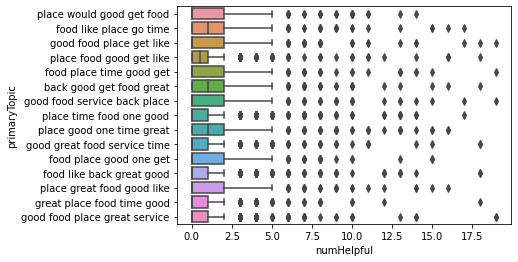

In [72]:
sns.boxplot(x="numHelpful", y="primaryTopic",  data=topics_df[topics_df['numHelpful'] < 20]);

In [ ]:
""" This looks fishy. It's not exactly uniform but it's pretty close to uniform."""

In [73]:
topics_df.head()

,food place good one get,good food place get like,food like place go time,back good get food great,food place time good get,place time food one good,place good one time great,good great food service time,good food service back place,great place food time good,place great food good like,place food good get like,place would good get food,food like back great good,good food place great service,primaryTopic,numHelpful
0,0.103868,0.049252,0.044440,0.054743,0.044651,0.063478,0.089636,0.055300,0.081002,0.086172,0.087448,0.039902,0.124170,0.027989,0.047949,place would good get food,10
1,0.220072,0.170989,0.247401,0.030606,0.021692,0.011198,0.010160,0.016519,0.000000,0.040672,0.022394,0.057154,0.011337,0.078715,0.056315,food like place go time,0
2,0.066869,0.106563,0.052703,0.085972,0.103494,0.042011,0.083594,0.035926,0.087433,0.049919,0.055567,0.051590,0.083966,0.051258,0.043136,good food place get like,2
3,0.065155,0.074362,0.069124,0.104831,0.132447,0.012927,0.000000,0.049254,0.024046,0.056847,0.103738,0.177307,0.045130,0.050461,0.024830,place food good get like,5
4,0.056011,0.100011,0.047930,0.031369,0.103503,0.101242,0.043709,0.041180,0.063487,0.100616,0.045600,0.055985,0.070514,0.046372,0.092469,food place time good get,5


In [74]:
topics_df['funny'] = yelp['useful']

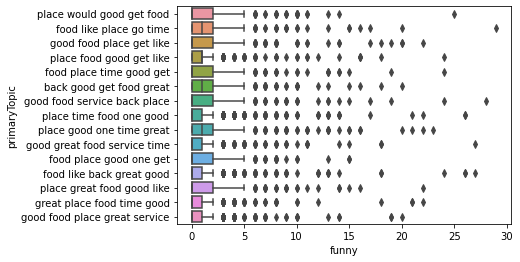

In [76]:
sns.boxplot(x="funny", y="primaryTopic",  data=topics_df[topics_df['numHelpful'] < 30]);

## Analysis of Topic Model

First off, my topic model appears to be broken. The LDAvis above leads me to believe that there isn't very much overlap in the topic model but actually looking at the model tells me there's ONLY overlap. It's as if the model is being generated on only one review or somehow picked only similar reviews. I have no idea why the model is behaving like this. Well, I do have some idea why; I'mnot as familiar with this material as I would like to be. I felt like I had some idea coming into this challenge.

I feel like I'm close to what would be useful but don't have the time to pick it out and fix it. The tokenizer was extracting just the letters as tokens so I put in another one that I learned from a Udemy course. Then my nearest neighbors fit wasn't a fit at all since it's like it just pulled in random reviews. And now my topic model is abyssmal. I tried with fewer topics and more topics. The same thing happened for me regardless of the number of topics.

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)